In [1]:
import numpy as np

import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import current_weather, sky_cover, StationPlot, simple_layout
from metpy.io import metar

import pandas as pd

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [14]:
filename = "20221212_1200"
data = metar.parse_metar_file(filename, year=2022, month=12)

data['air_temperature'] = (data['air_temperature']*9/5) + 32
data['dew_point_temperature'] = (data.dew_point_temperature*9/5) + 32
print(data.loc['KCLT'])

KeyError: "None of ['station_id'] are in the columns"

"plt.savefig('emptymap.png')"

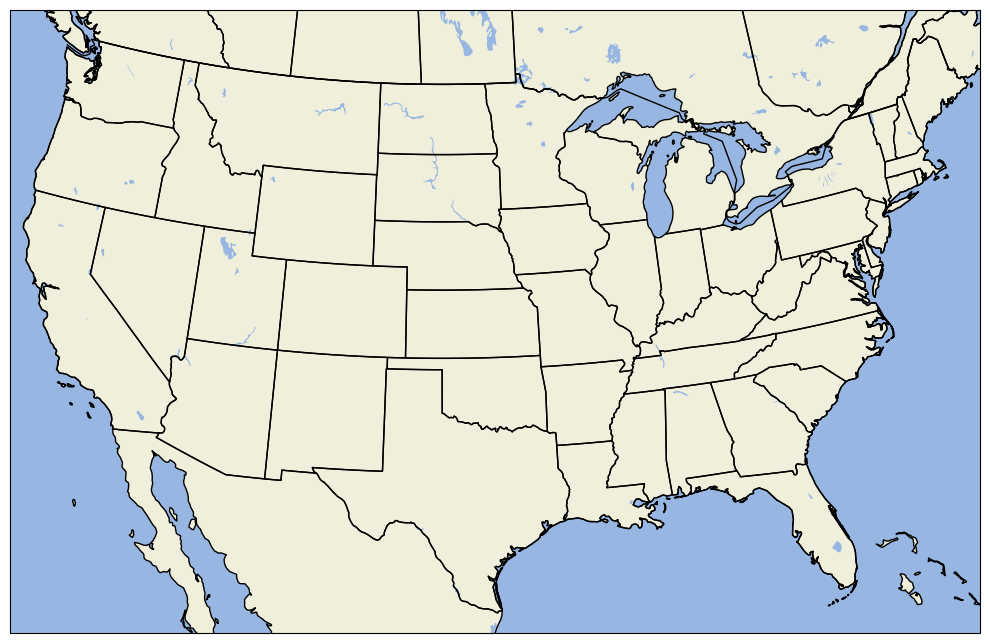

In [3]:
#map projection jusing a Lambert Conformal Projection
#we'll center the map at 100W,35N
proj = ccrs.LambertConformal(central_longitude=-100,central_latitude=35)

#create 10" x 10" figure with a dpi=100
fig = plt.figure(figsize=(10,10),dpi=100)
#add subplot with projection
ax = fig.add_subplot(1,1,1,projection=proj)

#add elements to make map more useable
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

#zoom on the CONUS
#lon_min = -120
#lon_max = -75
#lat_min = 23
#lat_max = 50
ax.set_extent((-120, -75, 23, 50))

fig.tight_layout()

#save the map as empty_map.png
'''plt.savefig('emptymap.png')'''

NameError: name 'data' is not defined

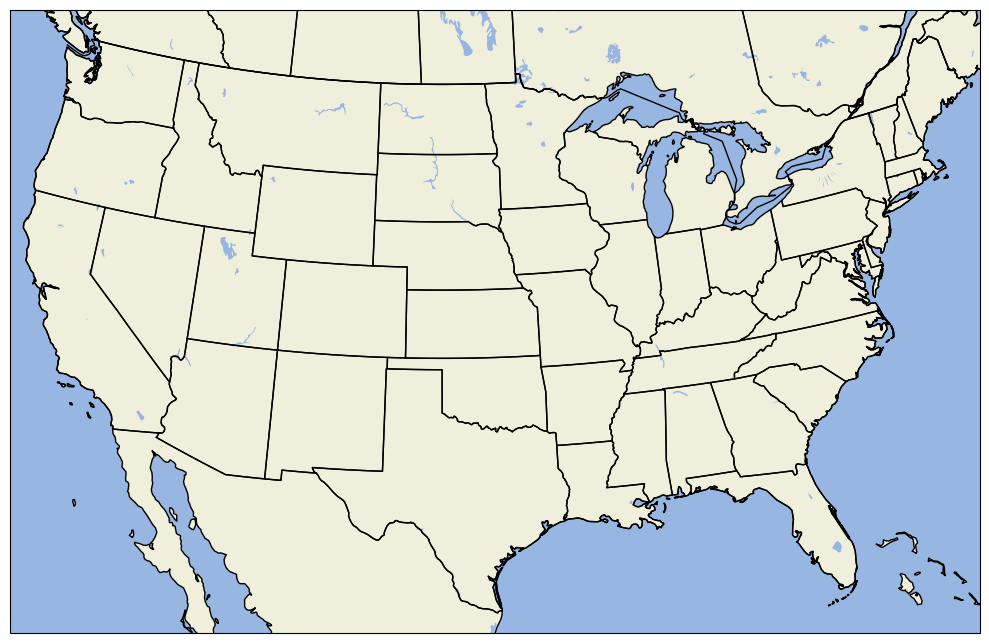

In [4]:
#map projection jusing a Lambert Conformal Projection
#we'll center the map at 100W,35N
proj = ccrs.LambertConformal(central_longitude=-100,central_latitude=35)

#create 10" x 10" figure with a dpi=100
fig = plt.figure(figsize=(10,10),dpi=100)
#add subplot with projection
ax = fig.add_subplot(1,1,1,projection=proj)

#add elements to make map more useable
ax.add_feature(cfeature.LAND,zorder=1)
ax.add_feature(cfeature.OCEAN,zorder=0)
ax.add_feature(cfeature.LAKES,zorder=2)
ax.add_feature(cfeature.COASTLINE,zorder=10)
ax.add_feature(cfeature.STATES,zorder=10)
ax.add_feature(cfeature.BORDERS,zorder=10)

ax.set_extent((-120, -75, 23, 50))

fig.tight_layout()

#plot surface obs using scatter plot
ax.scatter(data.longitude,data.latitude,transform=ccrs.PlateCarree(), color = 'pink', marker = '*',zorder=9)

fig.tight_layout()
#save the map as obs_locations.png
plt.savefig('obs_locations.png',bbox_inches='tight')

In [7]:
#first convert the lat/lon to map projection coordinates
locs = proj.transform_points(ccrs.PlateCarree(),data['longitude'].values,data['latitude'].values)

#now thin the data
data_thinned = data[mpcalc.reduce_point_density(locs,190*units('km'))]

NameError: name 'data' is not defined

NameError: name 'data_thinned' is not defined

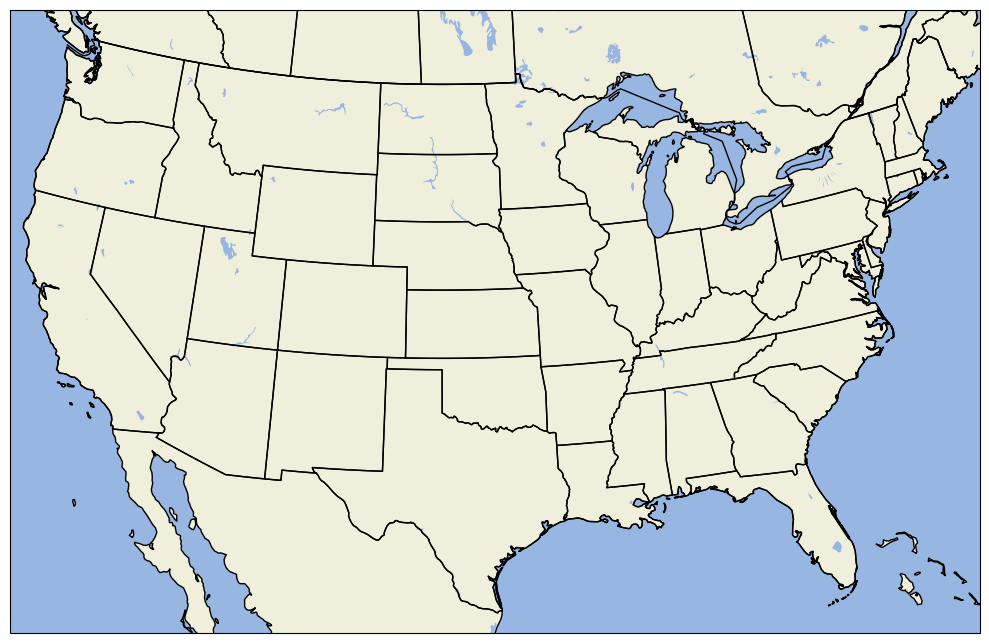

In [8]:
#save the map as obs_locations_thinned.png
#first convert the lat/lon to map projection coordinates

#map projection jusing a Lambert Conformal Projection
#we'll center the map at 100W,35N
proj = ccrs.LambertConformal(central_longitude=-100,central_latitude=35)

#create 10" x 10" figure with a dpi=100
fig = plt.figure(figsize=(10,10),dpi=100)
#add subplot with projection
ax = fig.add_subplot(1,1,1,projection=proj)

#add elements to make map more useable
ax.add_feature(cfeature.LAND,zorder=1)
ax.add_feature(cfeature.OCEAN,zorder=0)
ax.add_feature(cfeature.LAKES,zorder=2)
ax.add_feature(cfeature.COASTLINE,zorder=10)
ax.add_feature(cfeature.STATES,zorder=10)
ax.add_feature(cfeature.BORDERS,zorder=10)

ax.set_extent((-120, -75, 23, 50))

fig.tight_layout()

#plot surface obs using scatter plot
ax.scatter(data_thinned.longitude,data_thinned.latitude,transform=ccrs.PlateCarree(), color = 'pink', marker = '*',zorder=9)

fig.tight_layout()
#save the map as obs_locations.png
plt.savefig('obs_locations.png',bbox_inches='tight')



NameError: name 'data_thinned' is not defined

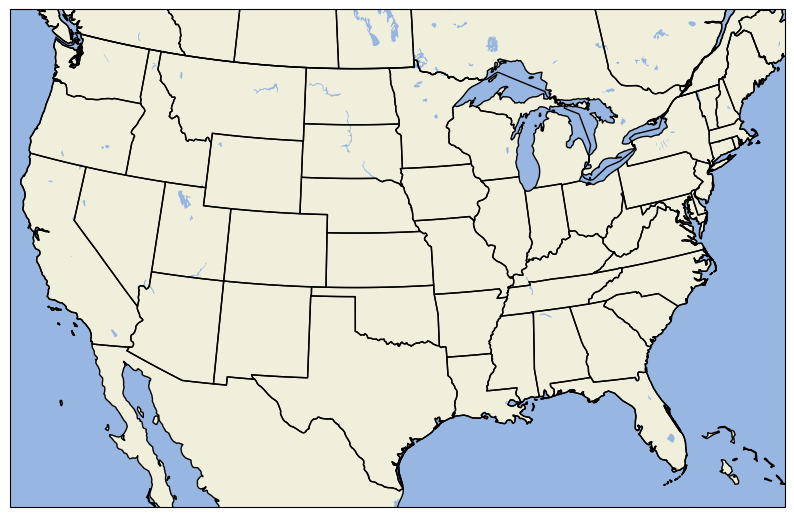

In [9]:
#save the map as obs_locations_thinned.png
#first convert the lat/lon to map projection coordinates

#map projection jusing a Lambert Conformal Projection
#we'll center the map at 100W,35N
proj = ccrs.LambertConformal(central_longitude=-100,central_latitude=35)

#create 10" x 10" figure with a dpi=100
fig = plt.figure(figsize=(10,10),dpi=100)
#add subplot with projection
ax = fig.add_subplot(1,1,1,projection=proj)

#add elements to make map more useable
ax.add_feature(cfeature.LAND,zorder=1)
ax.add_feature(cfeature.OCEAN,zorder=0)
ax.add_feature(cfeature.LAKES,zorder=2)
ax.add_feature(cfeature.COASTLINE,zorder=10)
ax.add_feature(cfeature.STATES,zorder=10)
ax.add_feature(cfeature.BORDERS,zorder=10)

ax.set_extent((-120, -75, 23, 50))

stationplots = StationPlot(ax, data_thinned['longitude'], data_thinned['latitude'], transform = ccrs.PlateCarree(),)
simple_layout.plot(stationplots,data_thinned)

fig.tight_layout() 

#save the map as simple_surface_obs.png
plt.savefig('simple_surface_obs.png')

In [10]:
data_thinned = data[mpcalc.reduce_point_density(locs,90*units('km'))]

NameError: name 'data' is not defined

In [11]:
#create wind gust vectors
u = data_thinned.eastward_wind.values * units('knots')
v = data_thinned.northward_wind.values * units('knots')
gust = data_thinned.wind_gust.values * units('knots')
wdir = mpcalc.wind_direction(u,v)

ug, vg = mpcalc.wind_components(gust,wdir)
#mpcalc.wind_direction(data_thinned).eastward_wind,data_thinned.northward_wind))
#do this by multiplying each component by the ratio of gust to speed
for i in ug:
    print(i)

NameError: name 'data_thinned' is not defined

NameError: name 'data_thinned' is not defined

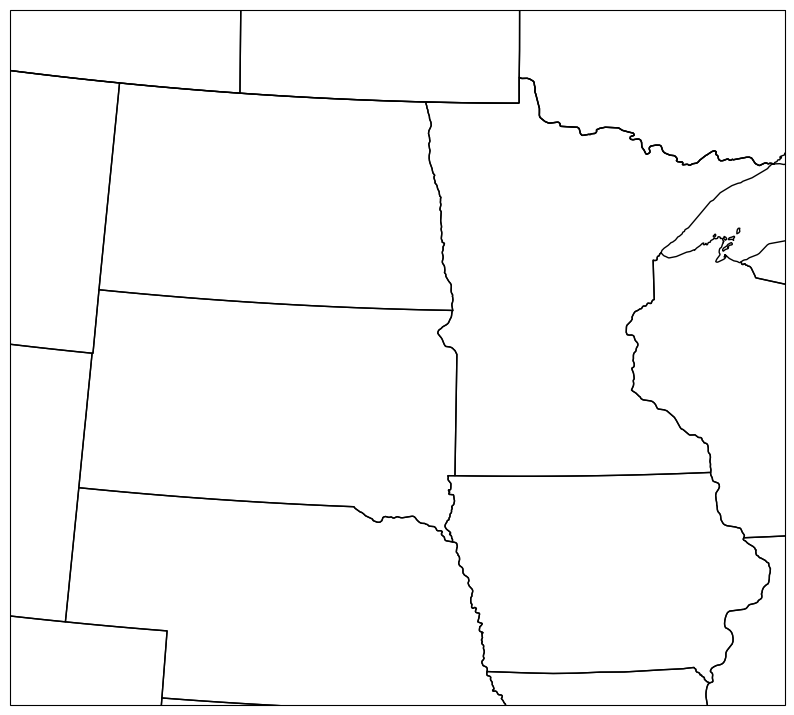

In [12]:
proj = ccrs.LambertConformal(central_longitude=-95,central_latitude=35)

#create figure
fig = plt.figure(figsize=(10,10),dpi=100)
ax = fig.add_subplot(1,1,1,projection=proj)

#add elements to make map more useable
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

#zoom on the Northern Plains
ax.set_extent((-105, -90, 40, 50))

#create stationplot (will actually need to create 2 to handle wind gusts)
stationplots = StationPlot(ax, data_thinned['longitude'], data_thinned['latitude'], transform = ccrs.PlateCarree(),clip_on='True',fontsize=8)
stationplots_barbs = StationPlot(ax, data_thinned['longitude'], data_thinned['latitude'], transform = ccrs.PlateCarree(),clip_on='True',fontsize=8)
#simple_layout.plot(stationplots,data_thinned)
#temperature in red
stationplots.plot_parameter((-1,1), data_thinned['air_temperature'].values, color='red')
#dewpoint in dark green
stationplots.plot_parameter((-1,-1), data_thinned['dew_point_temperature'].values, color='darkgreen')
#pressure (need to format to be the final 3 digits)
stationplots.plot_parameter((1,1), data_thinned['air_pressure_at_sea_level'].values, color='black', formatter=lambda p: format(10*p, '.0f')[-3:])
#station ID in dark blue
stationplots.plot_text((1.5,-1), data_thinned['station_id'].values, color='darkblue')
#visibility in black (need to convert from meters to miles)
stationplots.plot_parameter((-3,0), data_thinned['visibility'].values*units('meters').to('miles'), color = 'black')
#wind gust in red
stationplots_barbs.plot_barb(ug, vg, color = 'r', zorder=9)
#wind in black
stationplots.plot_barb(data_thinned['eastward_wind'].values, data_thinned['northward_wind'].values, zorder=10)
#cloud cover
stationplots.plot_symbol('C', data_thinned['cloud_coverage'].values, sky_cover)
#current weather
stationplots.plot_symbol('W', data_thinned['current_wx1_symbol'].values, current_weather)
#save the map as surface_obs.png
plt.savefig('surface_obs.png')